# Air Temperature Prediction Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data PreProcessing

In [2]:
df=pd.read_csv('CurrentFinal.csv', encoding= 'unicode_escape')

In [3]:
df.head()

,Date&Time,WIND DIRECTION( in DEGREES),WIND SPEED(in Knots),VISIBILITY(in Metre),Air Temperature(in ºC),Wet bulb Temperature(in ºC),Dew point Temperature(in ºC),Unnamed: 7,Unnamed: 8,total cloud(inOcta),PRESENT weather Code
0,04/01/2014 00,270.0,6.0,3000.0,21.0,16.0,12.1,999.5,1005.6,2,5.0
1,04/01/2014 01,270.0,6.0,3000.0,21.4,16.4,12.6,1000.3,1006.4,0,5.0
2,04/01/2014 02,270.0,6.0,3000.0,21.8,16.6,12.7,1000.6,1006.7,0,5.0
3,04/01/2014 03,280.0,5.0,4000.0,24.0,17.8,13.4,1001.6,1007.7,0,5.0
4,04/01/2014 04,280.0,8.0,5000.0,27.0,18.4,12.2,1001.1,1007.2,0,5.0


In [4]:
df.describe()

,WIND DIRECTION( in DEGREES),WIND SPEED(in Knots),VISIBILITY(in Metre),Air Temperature(in ºC),Wet bulb Temperature(in ºC),Dew point Temperature(in ºC),Unnamed: 7,Unnamed: 8,PRESENT weather Code
count,57614.000000,57597.000000,57628.000000,59942.000000,59199.000000,59942.000000,59952.000000,59952.000000,57582.000000
mean,123.788367,3.850999,3033.123516,24.774559,8.447024,18.507359,961.846998,967.977714,10.133288
std,111.846712,3.498080,1296.639753,8.576710,11.201398,7.605573,195.448501,195.423432,14.653282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2000.000000,20.200000,0.000000,13.200000,995.200000,1001.100000,5.000000
50%,90.000000,3.000000,3000.000000,27.000000,0.000000,20.400000,1000.700000,1006.600000,5.000000
75%,250.000000,6.000000,4000.000000,30.400000,20.200000,25.200000,1007.200000,1013.100000,10.000000
max,999.000000,84.000000,8000.000000,44.400000,78.000000,29.700000,1057.100000,1914.500000,99.000000


In [5]:
print(df['PRESENT weather Code'].unique())
print(df['total cloud(inOcta)'].unique())


[ 5.  2.  6.  7. 95. 60.  4. 29. 61. 13. 21. 63. 17. 10.  1. 62. 40. 44.
 11. 45. 47. 46. 43. 42. nan 41. 50. 96.  0.  3. 12. 71. 30. 66.  8. 35.
 51. 52. 20. 36. 65. 97. 25. 31. 32. 90. 93. 64. 70. 99.  9.]
['2' '0' '3' '4' '1' '5' '6' '7' '8' '9'
 '                                    ' nan]


In [6]:
##Check Missing or Null Values
df.isnull().sum()

Date&Time                          0
WIND DIRECTION( in DEGREES)     2338
WIND SPEED(in Knots)            2355
VISIBILITY(in Metre)            2324
Air Temperature(in ºC)            10
Wet bulb Temperature(in ºC)      753
Dew point Temperature(in ºC)      10
Unnamed: 7                         0
Unnamed: 8                         0
total cloud(inOcta)             2347
PRESENT weather Code            2370
dtype: int64

In [7]:
#Removing the Columns which had more than 50% of Null Values
df=df.dropna(thresh=df.shape[0]*0.5,how='all',axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59952 entries, 0 to 59951
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date&Time                     59952 non-null  object 
 1   WIND DIRECTION( in DEGREES)   57614 non-null  float64
 2   WIND SPEED(in Knots)          57597 non-null  float64
 3   VISIBILITY(in Metre)          57628 non-null  float64
 4   Air Temperature(in ºC)        59942 non-null  float64
 5   Wet bulb Temperature(in ºC)   59199 non-null  float64
 6   Dew point Temperature(in ºC)  59942 non-null  float64
 7   Unnamed: 7                    59952 non-null  float64
 8   Unnamed: 8                    59952 non-null  float64
 9   total cloud(inOcta)           57605 non-null  object 
 10  PRESENT weather Code          57582 non-null  float64
dtypes: float64(9), object(2)
memory usage: 4.6+ MB


In [9]:
##Finding Correlation in Data
df.corr()

,WIND DIRECTION( in DEGREES),WIND SPEED(in Knots),VISIBILITY(in Metre),Air Temperature(in ºC),Wet bulb Temperature(in ºC),Dew point Temperature(in ºC),Unnamed: 7,Unnamed: 8,PRESENT weather Code
WIND DIRECTION( in DEGREES),1.000000,0.346651,0.195804,0.138588,0.032333,-0.144008,0.003293,0.017359,-0.040876
WIND SPEED(in Knots),0.346651,1.000000,0.444442,0.455974,0.058498,0.245532,-0.076297,-0.115670,-0.055447
VISIBILITY(in Metre),0.195804,0.444442,1.000000,0.760623,0.075679,0.306064,-0.072843,-0.117748,-0.374438
Air Temperature(in ºC),0.138588,0.455974,0.760623,1.000000,0.238560,0.721616,0.554360,0.555268,-0.257297
Wet bulb Temperature(in ºC),0.032333,0.058498,0.075679,0.238560,1.000000,0.199728,0.148118,0.147887,-0.045594
Dew point Temperature(in ºC),-0.144008,0.245532,0.306064,0.721616,0.199728,1.000000,0.462794,0.464380,-0.019166
Unnamed: 7,0.003293,-0.076297,-0.072843,0.554360,0.148118,0.462794,1.000000,0.987244,0.004874
Unnamed: 8,0.017359,-0.115670,-0.117748,0.555268,0.147887,0.464380,0.987244,1.000000,0.016644
PRESENT weather Code,-0.040876,-0.055447,-0.374438,-0.257297,-0.045594,-0.019166,0.004874,0.016644,1.000000


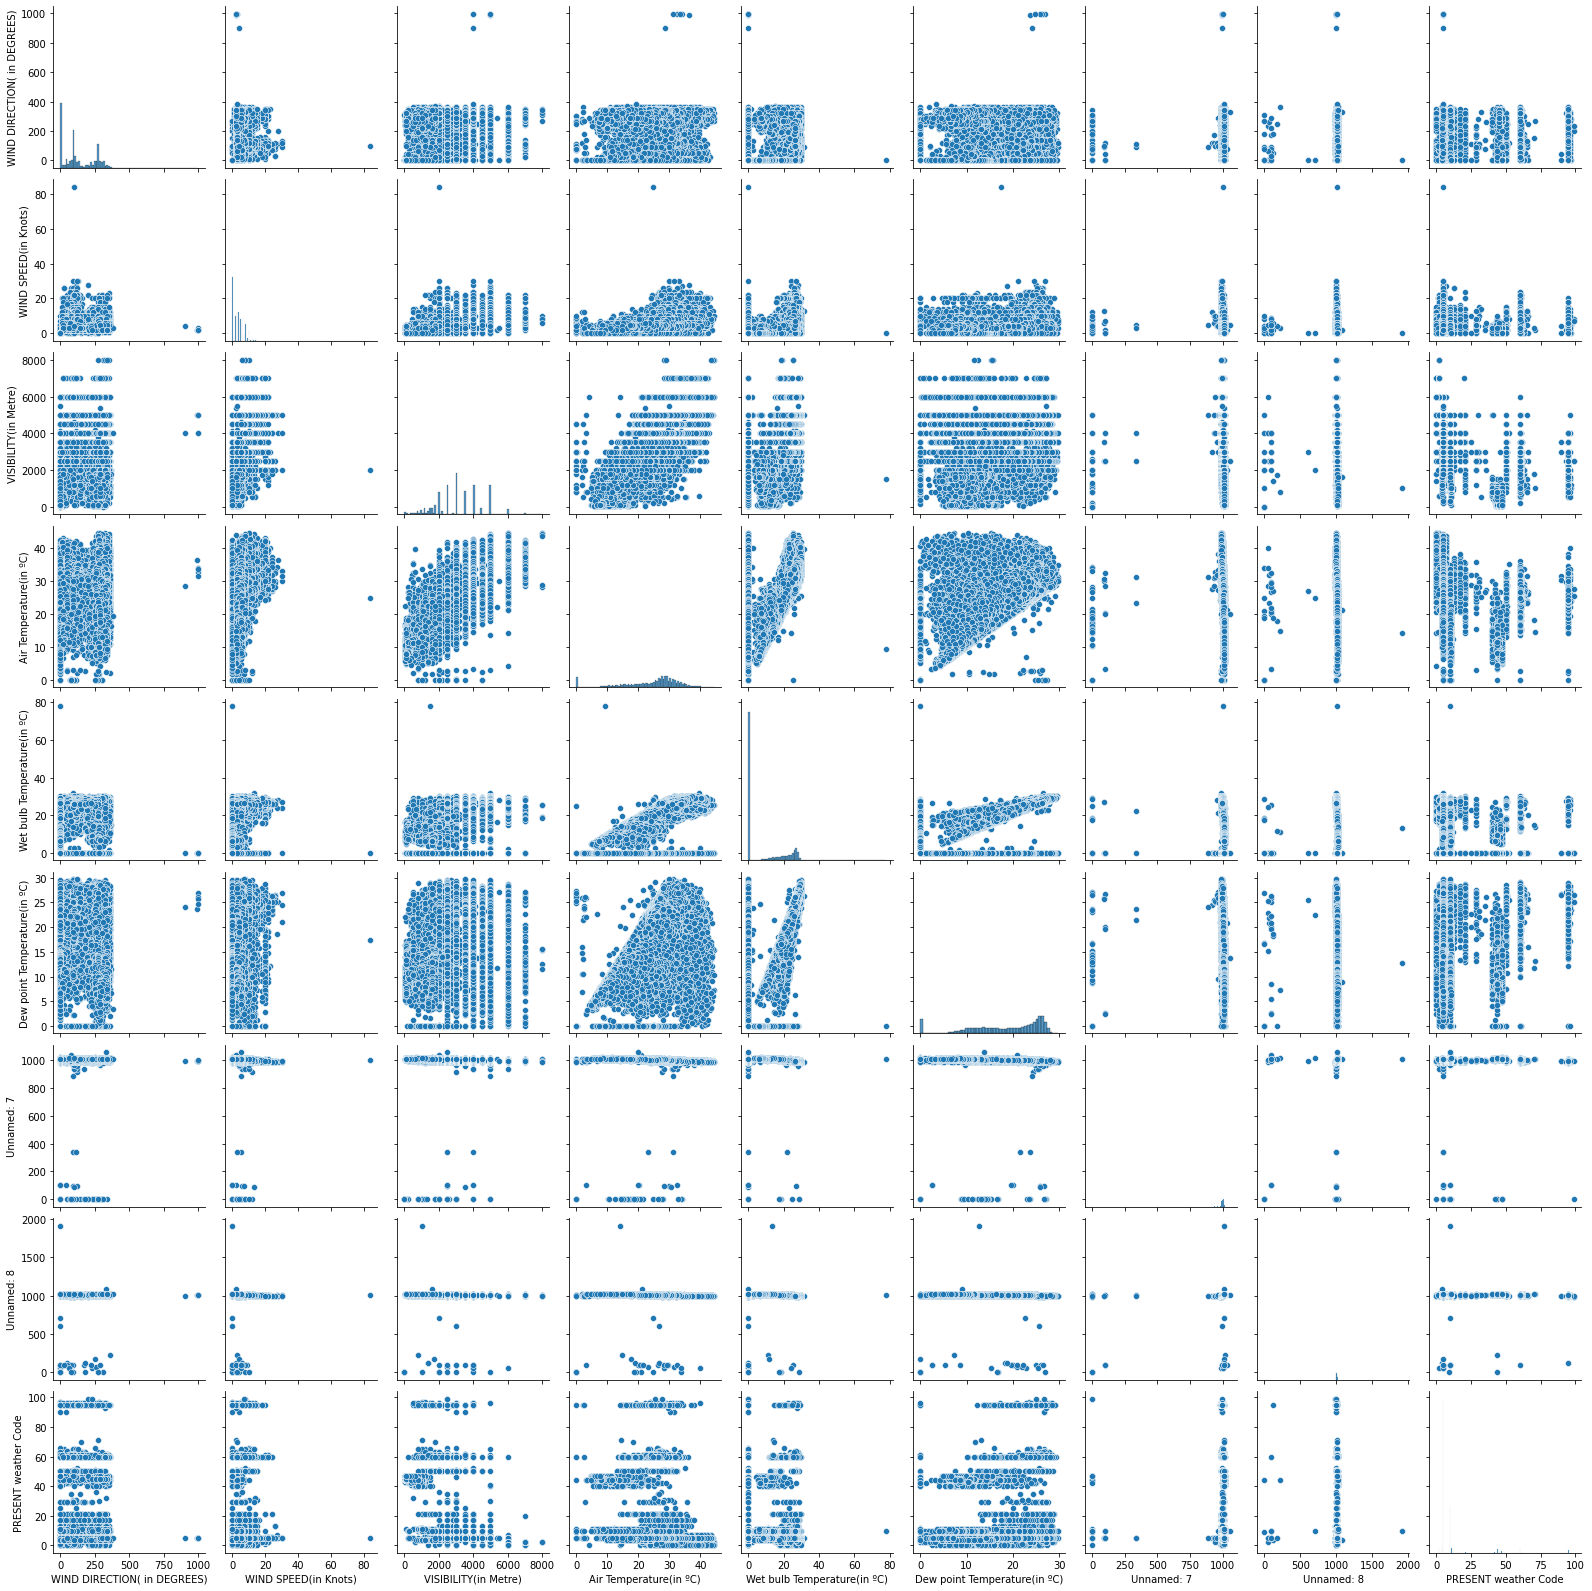

In [10]:
##Plotting the Correlation  for better Visualization
sns.pairplot(df)

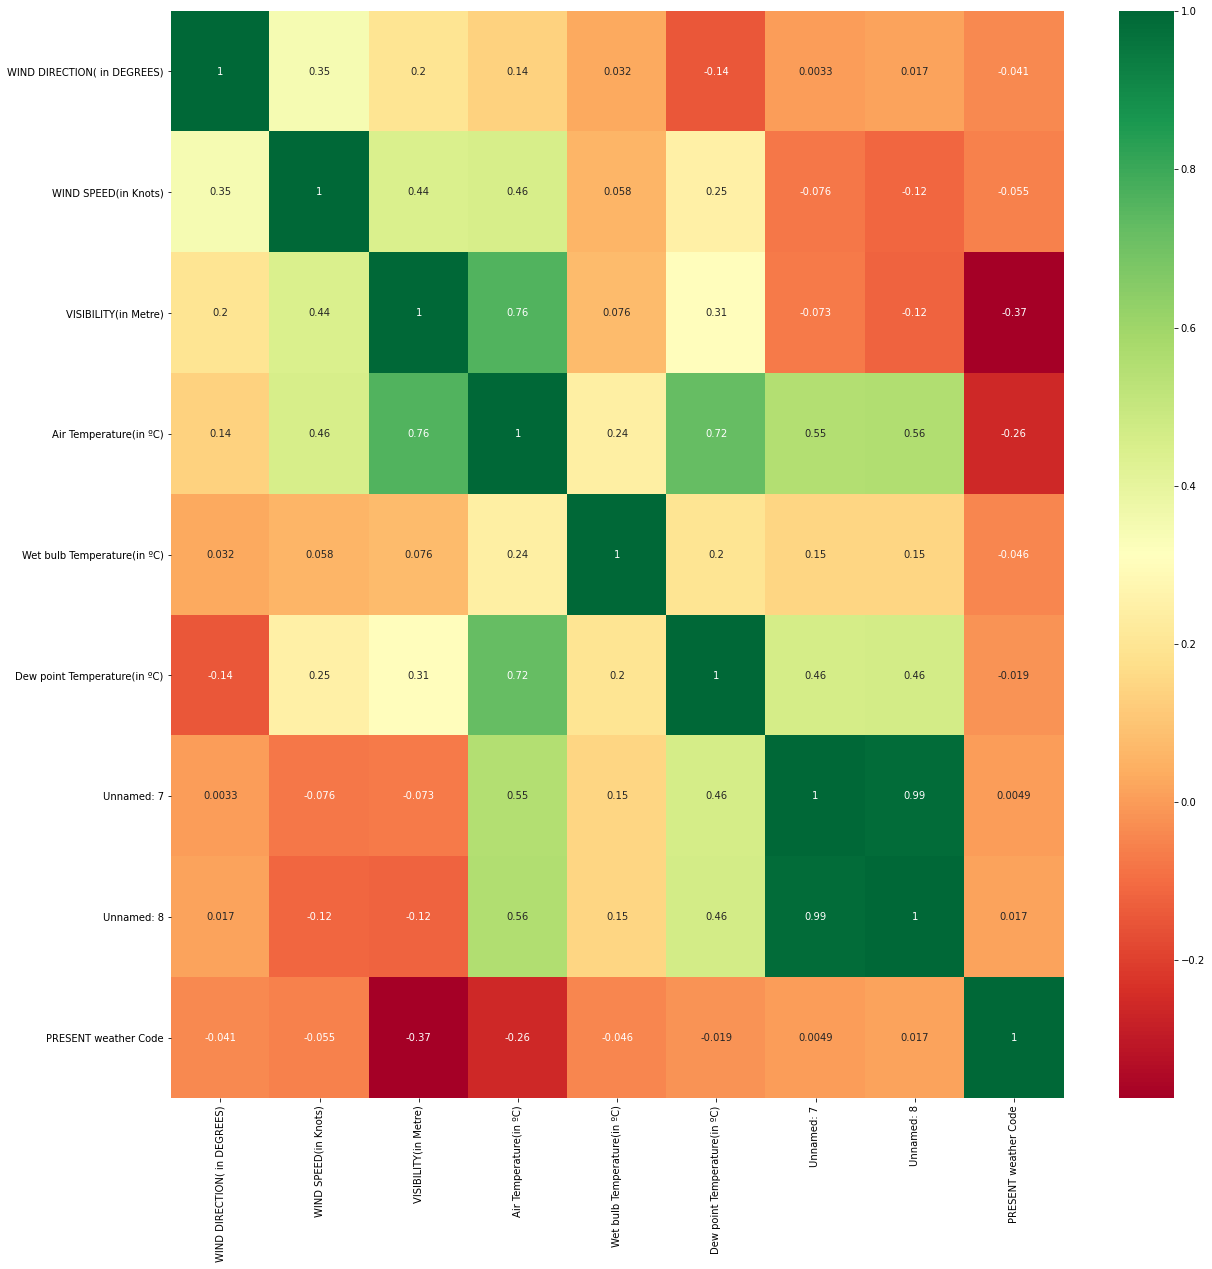

In [11]:
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
#PLotting the Heat Map of Correlation for better Understanding of the Data
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
## We see that :
##Unnamed7 is Highly Correlated with Unnamed8


In [13]:
##Dropping the Column Unnamed8 and total cloud(inOcta)
final_dataset=df.drop(columns=['Date&Time','Unnamed: 8','total cloud(inOcta)'])

In [14]:
final_dataset.head()

,WIND DIRECTION( in DEGREES),WIND SPEED(in Knots),VISIBILITY(in Metre),Air Temperature(in ºC),Wet bulb Temperature(in ºC),Dew point Temperature(in ºC),Unnamed: 7,PRESENT weather Code
0,270.0,6.0,3000.0,21.0,16.0,12.1,999.5,5.0
1,270.0,6.0,3000.0,21.4,16.4,12.6,1000.3,5.0
2,270.0,6.0,3000.0,21.8,16.6,12.7,1000.6,5.0
3,280.0,5.0,4000.0,24.0,17.8,13.4,1001.6,5.0
4,280.0,8.0,5000.0,27.0,18.4,12.2,1001.1,5.0


In [15]:
##Finding Correaltion with Air Temperature(in ºC)

In [16]:
corr_matr=final_dataset.corr()
corr_matr['Air Temperature(in ºC)'].sort_values(ascending=False)

Air Temperature(in ºC)          1.000000
VISIBILITY(in Metre)            0.760623
Dew point Temperature(in ºC)    0.721616
Unnamed: 7                      0.554360
WIND SPEED(in Knots)            0.455974
Wet bulb Temperature(in ºC)     0.238560
WIND DIRECTION( in DEGREES)     0.138588
PRESENT weather Code           -0.257297
Name: Air Temperature(in ºC), dtype: float64

<AxesSubplot:xlabel='Air Temperature(in ºC)', ylabel='VISIBILITY(in Metre)'>

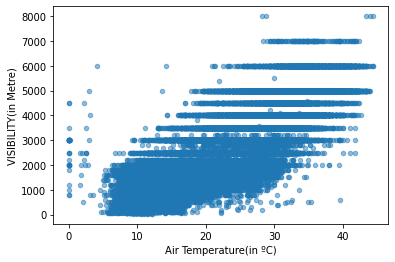

In [17]:
final_dataset.plot(kind="scatter",x="Air Temperature(in ºC)",y="VISIBILITY(in Metre)",alpha=0.5)

In [18]:
##We see that VISIBILITY(in Metre) and Dew point Temperature(in ºC) affects the Air Temperature(in ºC) alot

In [19]:
##Trying Different Combination of Attributes
final_dataset['wetpervis']=final_dataset['Wet bulb Temperature(in ºC)']/final_dataset['VISIBILITY(in Metre)']

In [20]:
final_dataset.head()

,WIND DIRECTION( in DEGREES),WIND SPEED(in Knots),VISIBILITY(in Metre),Air Temperature(in ºC),Wet bulb Temperature(in ºC),Dew point Temperature(in ºC),Unnamed: 7,PRESENT weather Code,wetpervis
0,270.0,6.0,3000.0,21.0,16.0,12.1,999.5,5.0,0.005333
1,270.0,6.0,3000.0,21.4,16.4,12.6,1000.3,5.0,0.005467
2,270.0,6.0,3000.0,21.8,16.6,12.7,1000.6,5.0,0.005533
3,280.0,5.0,4000.0,24.0,17.8,13.4,1001.6,5.0,0.004450
4,280.0,8.0,5000.0,27.0,18.4,12.2,1001.1,5.0,0.003680


In [21]:
corr_matr=final_dataset.corr()
corr_matr['Air Temperature(in ºC)'].sort_values(ascending=False)

Air Temperature(in ºC)          1.000000
VISIBILITY(in Metre)            0.760623
Dew point Temperature(in ºC)    0.721616
Unnamed: 7                      0.554360
WIND SPEED(in Knots)            0.455974
Wet bulb Temperature(in ºC)     0.238560
WIND DIRECTION( in DEGREES)     0.138588
wetpervis                      -0.145348
PRESENT weather Code           -0.257297
Name: Air Temperature(in ºC), dtype: float64

In [22]:
##The attribute we made Wet bulb Temperature(in ºC) per Visibility  is highly Negatively correlated data with Air Temperature(in ºC)

<AxesSubplot:xlabel='Air Temperature(in ºC)', ylabel='wetpervis'>

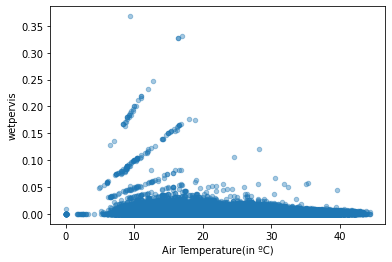

In [23]:
final_dataset.plot(kind="scatter",x="Air Temperature(in ºC)",y="wetpervis",alpha=0.4)

In [33]:
##Removing Null Values from the final dataset
final_dataset.dropna(inplace=True)


In [34]:
y=final_dataset['Air Temperature(in ºC)']

In [35]:
X=final_dataset.drop(columns=['Air Temperature(in ºC)'])

In [36]:
##Train Test Splitting

In [37]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2,random_state=42)

In [38]:
print(f"Rows in X_train set:{len(xtrain)}\n")
print(f"Rows in X_test set:{len(xtest)}\n")
print(f"Rows in Y_train set:{len(ytrain)}\n")
print(f"Rows in Y_test set:{len(ytest)}\n")

Rows in X_train set:45433

Rows in X_test set:11359

Rows in Y_train set:45433

Rows in Y_test set:11359



## Linear Regression 

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
model1=LinearRegression(normalize=True)


In [41]:
model1.fit(xtrain,ytrain)

LinearRegression(normalize=True)

In [42]:
prediction1=model1.predict(xtest)

In [47]:
ytest

44294    32.4
58975    17.0
34214    25.0
44809    29.4
18224    43.6
         ... 
13075    26.0
8929     23.0
10178    28.8
26503    36.8
21420    31.4
Name: Air Temperature(in ºC), Length: 11359, dtype: float64

In [46]:
prediction1

array([26.93448581, 16.63528337, 23.77863858, ..., 29.79997677,
       28.7162965 , 30.56308285])

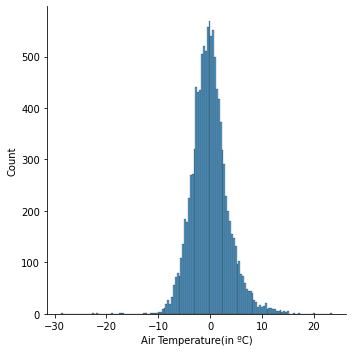

In [59]:
sns.displot(ytest-prediction1)

In [68]:
##Mean Absolute Error in the predicited output and our output
from sklearn.metrics import mean_squared_error
mean_squared_error(prediction1,ytest)

12.178463122689822

## Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [49]:
##HyperParameters
import numpy as np
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [50]:
#Randomized Search CV

#Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#Number of features to consider at every split
max_features=['auto','sqrt']
#Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
#max_depth.append(none)
#Minimum number of samples required to split a node
min_samples_split=[2,5,10,15,100]
#Minimum Number of Samples required at each Leaf Node
min_samples_leaf=[1,2,5,10]

In [51]:
from sklearn.model_selection import RandomizedSearchCV

In [52]:
#Create the Random Grid
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [53]:
#Use the random grid to search for best hyperparameters
#First Create the best model to tune
rf=RandomForestRegressor()

In [54]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [55]:
rf_random.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  18.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  17.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  18.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  22.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  19.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  36.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  39.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\joblib\parallel.py", line 1044, in __call__
    while self.dispatch_one_batch(iterator):
  File "c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\hp\appdata\loc

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  15.1s


c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\joblib\parallel.py", line 1044, in __call__
    while self.dispatch_one_batch(iterator):
  File "c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\hp\appdata\loc

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  15.8s


c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\joblib\parallel.py", line 1044, in __call__
    while self.dispatch_one_batch(iterator):
  File "c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\hp\appdata\loc

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  15.1s


c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\joblib\parallel.py", line 1044, in __call__
    while self.dispatch_one_batch(iterator):
  File "c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\hp\appdata\loc

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  14.8s


c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\joblib\parallel.py", line 1044, in __call__
    while self.dispatch_one_batch(iterator):
  File "c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\hp\appdata\loc

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  15.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=  16.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=  18.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=  17.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=  16.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=  17.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=  12.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=  12.8s
[CV] END max_depth=15, max_

c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [-5.24780773 -4.33505492 -4.87554571 -4.13855121 -4.29510807         nan
 -8.02508712 -4.35105584 -8.01613665 -4.08939088]
  category=UserWarning


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [56]:
predictions2=rf_random.predict(xtest)

In [57]:
predictions2

array([34.51051323, 17.85877874, 23.79206944, ..., 28.75012853,
       33.73262704, 30.8996089 ])

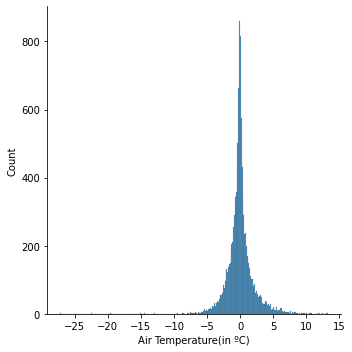

In [58]:
sns.displot(ytest-predictions2)

In [69]:
mean_squared_error(predictions2,ytest)

3.8318539991793417

## Result
We found that Random Forest Regressor is a better model for making the prediction with a Mean Squared Error of 3.81 compared to that of Linear Regression whose Mean Squared Error was 12.82